# Chargement des données : Apprentissage Profond

In [13]:
!git clone https://github.com/ImKiwii/DeepLearning.git
path = "./DeepLearning/Images_DB/"

fatal: destination path 'DeepLearning' already exists and is not an empty directory.


In [14]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat

def load_data(data_path, classes, dataset='train', image_size=64):
  
  num_images = 0
  for i in range(len(classes)):
      dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
      num_images += len(dirs)
  
  x = np.zeros((num_images, image_size, image_size, 3))
  y = np.zeros((num_images, 1))

  current_index = 0

  # Parcours des différents répertoires pour collecter les images
  for idx_class in range(len(classes)):
      dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
      num_images += len(dirs)

      # Chargement des images
      for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
  return x, y


In [16]:
labels = ['sad', 'happy', "angry", "fear", "thoughtful"]

x_train, y_train = load_data(path, labels, dataset='train', image_size=64)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=64)
print(x_test.shape, y_test.shape)

./DeepLearning/Images_DB/train/sad
test
./DeepLearning/Images_DB/train/happy
test
./DeepLearning/Images_DB/train/angry
test
./DeepLearning/Images_DB/train/fear
test
./DeepLearning/Images_DB/train/thoughtful
test
(834, 64, 64, 3) (834, 1)
./DeepLearning/Images_DB/validation/sad
test
./DeepLearning/Images_DB/validation/happy
test
./DeepLearning/Images_DB/validation/angry
test
./DeepLearning/Images_DB/validation/fear
test
./DeepLearning/Images_DB/validation/thoughtful
test
(123, 64, 64, 3) (123, 1)
./DeepLearning/Images_DB/test/sad
test
./DeepLearning/Images_DB/test/happy
test
./DeepLearning/Images_DB/test/angry
test
./DeepLearning/Images_DB/test/fear
test
./DeepLearning/Images_DB/test/thoughtful
test
(124, 64, 64, 3) (124, 1)


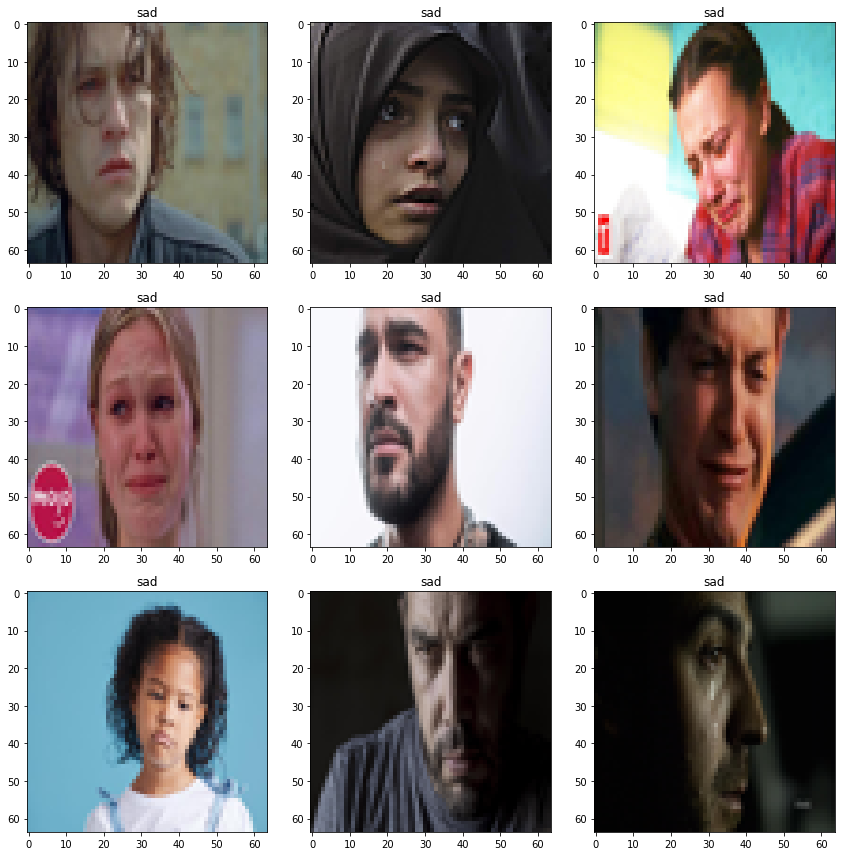

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()